In [1]:
from utils import *

# Signatures of dark companions in Gaia data. 

Using the formalism in Andrew et al, the mass of a dark companion (BH or NS) can be estimated if both RUWE and Radial Velocity error are available. 

Using population synthesis and the astromet software generate mock Gaia data and predict the distribution of companion masses (or mass ratios) for sources in Gaia DR3.

Identify binary systems that posses signatures of dark companions in Gaia data using RUWE for the selection and infer the mass and period of the dark companion using a combination of orbital parameters and errors. 

RUWE - re-normalized quare root of the reduced chi-square

Use RUWE to select the star systems to analyze. Look for high RUWE

High RUWE are dominated by sources with unmodelled extra contributions of noise, most ubiquitously caused by binary (and higher multiple) systems

(RUWE is expected to be around 1.0 for sources where the single-star model provides a good fit to the astrometric observations. A value significantly greater than 1.0 (say, >1.4) could indicate that the source is non-single or otherwise problematic for the astrometric solution.)

Possible projects explorations 

- Identify semi resolved systems from gaia to look for systems with star clusters near a black hole and identify them
- Use ML to classify objects in the Gaia DR3 catalogue: apply labels such as “galaxy nucleus”, “binary star”, “star-forming region”

In [2]:
# read the CSV file back into a DataFrame
df = pd.read_csv('data/100k.csv')

# print the column names
print(df.columns)

Index(['RA', 'Dec', 'pmRA', 'pmDec', 'pllx', 'M_tot', 'q', 'l', 'a', 'e', 'P',
       'tPeri', 'vTheta', 'vPhi', 'vOmega', 'predict_dTheta', 'simple_dTheta',
       'N_obs', 'sigma_al', 'sigma_ac', 'fit_ra', 'fit_dec', 'fit_pmrac',
       'fit_pmdec', 'fit_pllx', 'sigma_rac', 'sigma_dec', 'sigma_pmrac',
       'sigma_pmdec', 'sigma_pllx', 'N_vis', 'frac_good', 'AEN', 'UWE'],
      dtype='object')


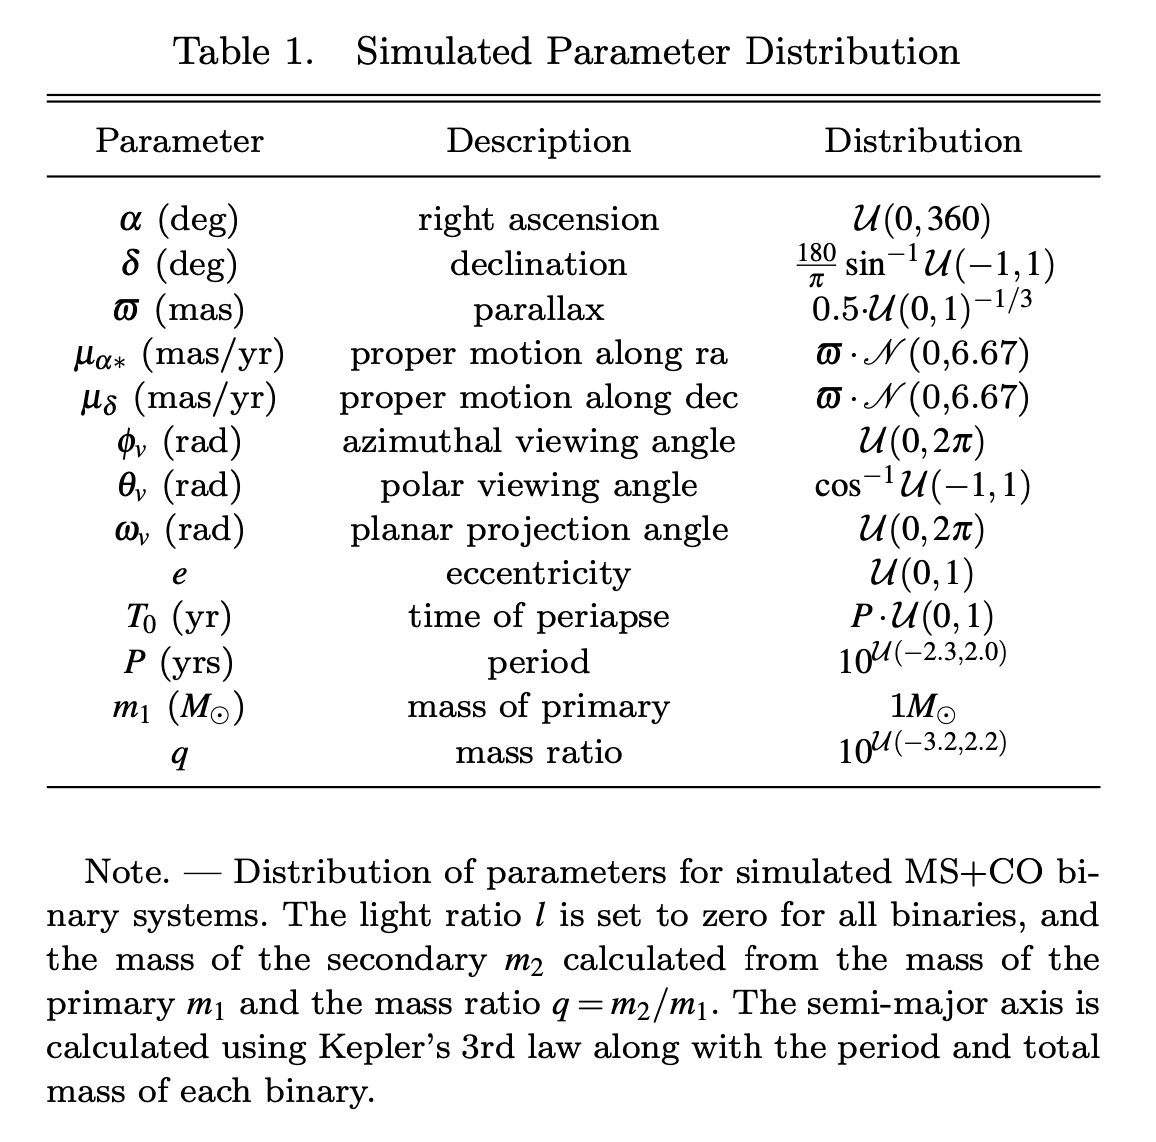

In [3]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/sim_param_distr.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed

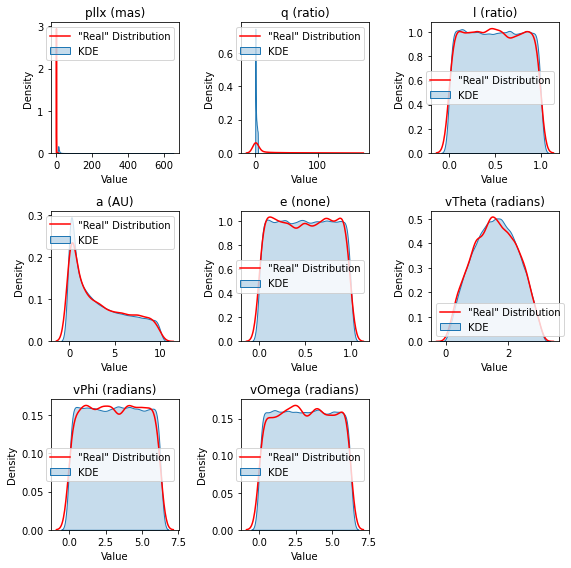

In [4]:
# Example usage
columns_to_plot = ['pllx', 'q', 'l', 'a', 'e', 'vTheta', 'vPhi', 'vOmega']
units = {
    'pllx': ' (mas)',
    'q': ' (ratio)',
    'l': ' (ratio)',
    'a': ' (AU)',
    'e': ' (none)',
    'vTheta': ' (radians)',
    'vPhi': ' (radians)',
    'vOmega': ' (radians)'
}

plot_distributions(df, columns_to_plot, units)

In [5]:
# Keep in the dataframe only Periods less than dr3Period = 2.8333333333333335 years
df = df[df['P'] <= dr3Period]

### Calculate $\zeta_0$ (P = B)

##### this result agrees well for all P < B but deviates at longer periods - Andrew et al

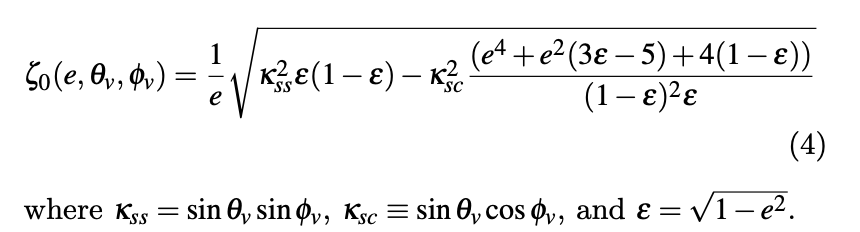

In [6]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/zeta_0.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


In [7]:
# test the function on df['e'], df['vTheta'], df['vPhi']
df['zeta_0'], indeces = zeta_0(df['e'], df['vTheta'], df['vPhi'])

# use indeces to get the rows of the df
df.loc[indeces]

# remove all these rows from the DataFrame
df = df.drop(indeces)

# remove all the zeta_0 values > 1
df = df[df['zeta_0'] <= 1]

/Users/ynwa1995/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


### $\beta_0$

### Calculate $\beta_0$ (P = B)

##### this result agrees well for all P < B but deviates at longer periods - Andrew et al

In [8]:
# calculate beta_0 for all the data points in the dataframe
df['beta_0'] = beta_0(df['e'], df['vTheta'], df['vPhi'])

# Plot $\Theta_{\nu}$ vs $\Phi_{\nu}$

##### for $ecc = [0.01 \text{ to } 0.99]$ 
##### *color-mapped by* *$\zeta_0$*, *$\beta_0$*, *$\frac{\zeta_0}{\beta_0}$*, *$\frac{\zeta_0^2}{\beta_0}$*

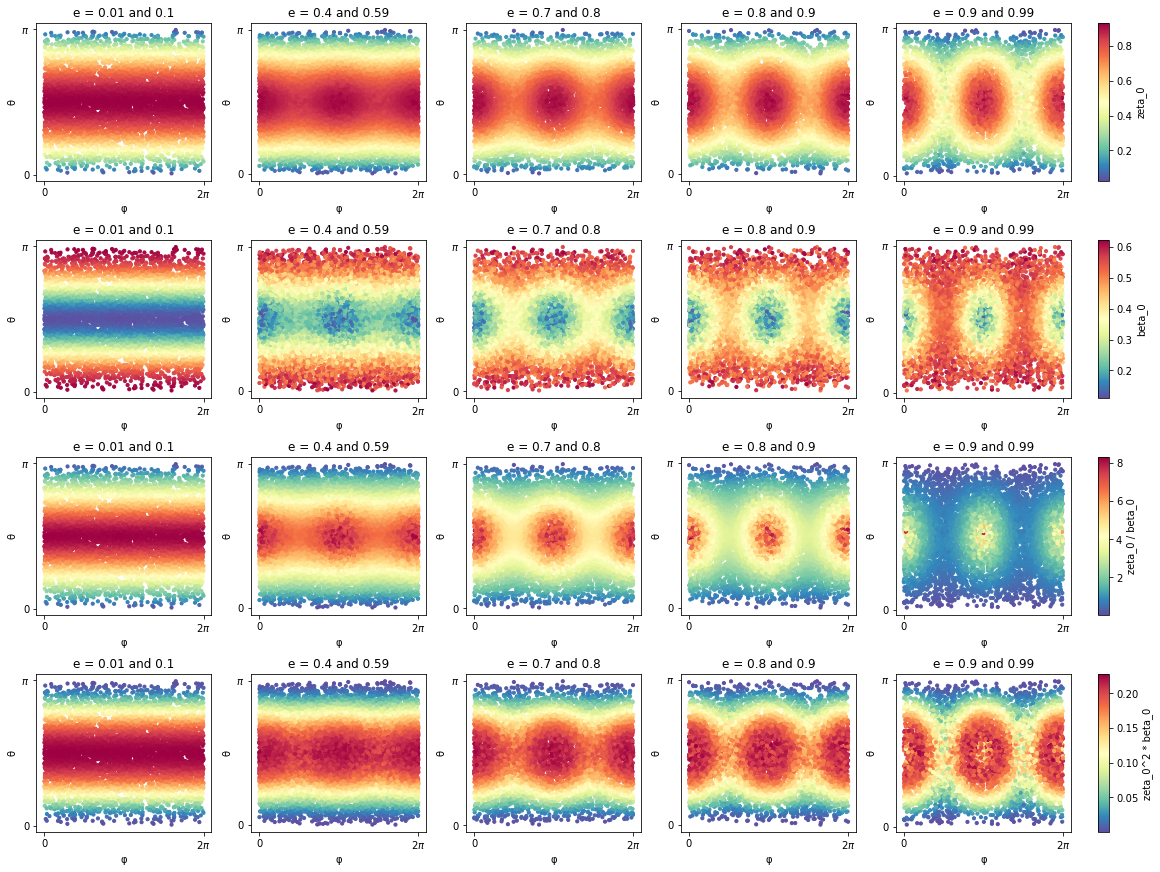

In [9]:
eccentricity_ranges = [
    (0.01, 0.1),
    (0.4, 0.59),
    (0.7, 0.8),
    (0.8, 0.9),
    (0.9, 0.99)
]

color_codes = [
    ('zeta_0', 'zeta_0', lambda df: df['zeta_0']),
    ('beta_0', 'beta_0', lambda df: df['beta_0']),
    ('zeta_0/beta_0', 'zeta_0 / beta_0', lambda df: df['zeta_0'] / df['beta_0']),
    ('zeta_0**2 * beta_0', 'zeta_0^2 * beta_0', lambda df: (df['zeta_0']**2) * df['beta_0'])
]

# Assuming df is your DataFrame
plot_eccentricity_distributions(df, eccentricity_ranges, color_codes)

# Calculate Radial Velocity Error
        
#### Assume P<=B and zeta = zeta_0

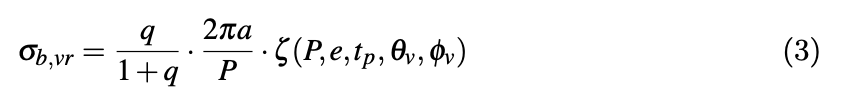

In [10]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/spectr_error.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


### Units: 
- q (none)
- a (AU)
- P (yrs)
- $\zeta_0$ (none)

$\sigma_{(b),(vr)}$ $\left(\frac{\text{AU}}{\text{yrs}}\right)$

In [11]:
df['sigma_spectroscopic_error'] = sigma_spectroscopic_error(df['q'], df['a'], df['P'], df['zeta_0'])

# Calculate sigma_theta

#### Assume P<=B and beta = beta_0

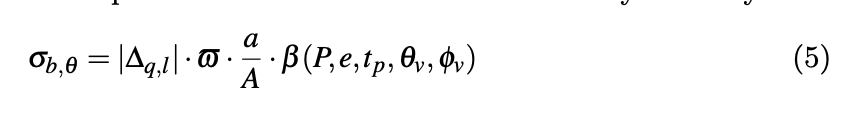

In [12]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/astr_error.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed

### Units: 
- q (none)
- l (none)
- parallax (mas)
- a (AU)
- A ($AU^{-1}$)
- beta (none)

$\sigma_{(b),(\theta)}$ ($\text{mas}$)

In [13]:
df['sigma_astrometric_error'] = sigma_astrometric_error(df['q'], df['l'], df['pllx'], df['a'], AU, df['beta_0'])

# Calculate inferred P and q 

#### The inferred mass ratios and periods using Equations 8 and 11 are described below

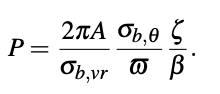

In [14]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/inferred_P.png'
display(Image(filename=img_path, width=200, height=100))  # Adjust width and height as needed

### Units: 
- A (AU)
- $\sigma_{(b),(\theta)}$ ($\text{mas}$)
- $\sigma_{(b),(vr)}$ $(\text{AU}^{-1}\text{yrs})$
- parallax ($mas^{-1}$)
- zeta 
- beta

P (yrs)


In [15]:
df['inferred_P'] = inferred_P(AU, df['sigma_spectroscopic_error'], df['sigma_astrometric_error'], df['pllx'], df['zeta_0'], df['beta_0'])


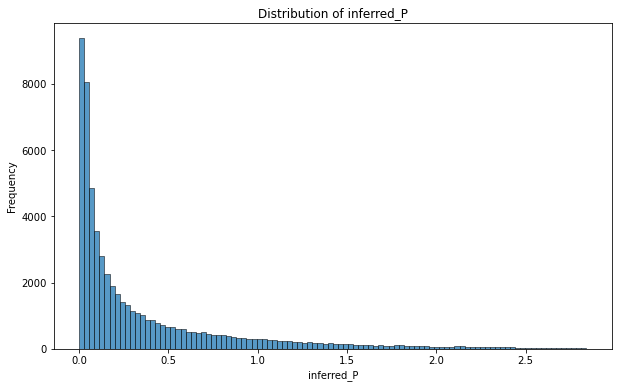

In [16]:
# make a dataframe with df['inferred_P'] < 2.84 
df_filter = df[df['inferred_P'] < 2.84]

# plot df_filter distribution of ['inferred_P']
plt.figure(figsize=(10, 6))
sns.histplot(df_filter['inferred_P'], bins=100)
plt.xlabel('inferred_P')
plt.ylabel('Frequency')
plt.title('Distribution of inferred_P')
plt.show()


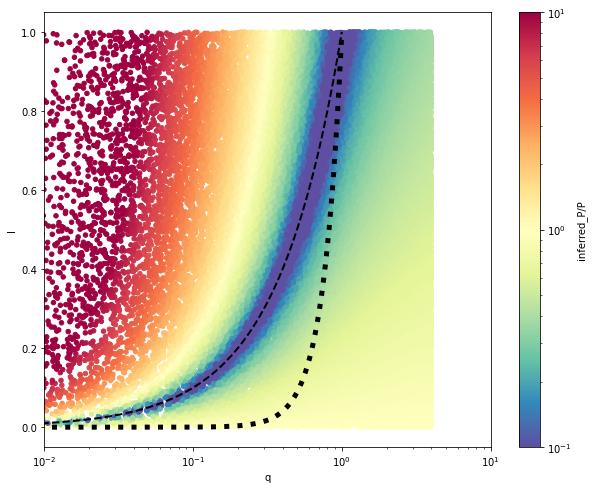

In [17]:
plot_scatter_with_lines(df_filter, 'q', 'l', 'inferred_P', 'P', 'inferred_P/P')

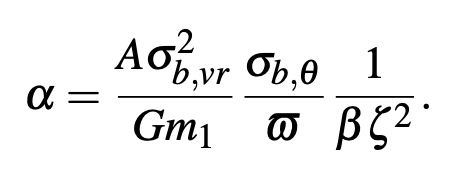

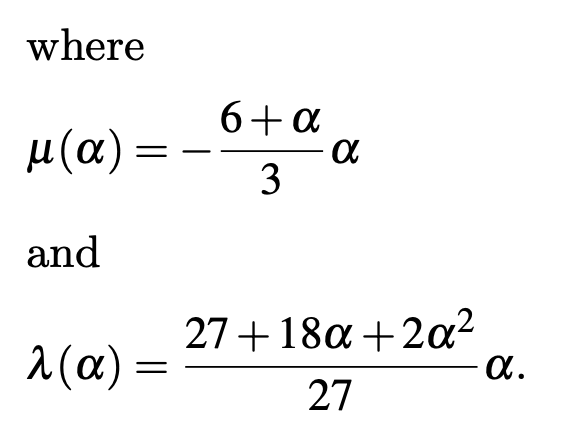

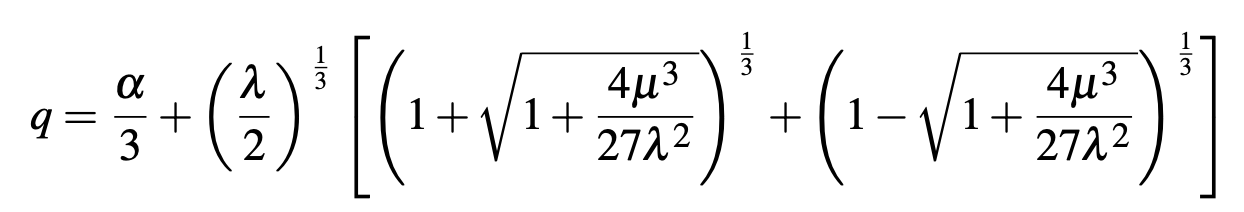

In [18]:
from IPython.display import Image, display

# Display an image from a local file with specified size
img_path = 'images/solve_q_1.png'
display(Image(filename=img_path, width=150, height=100))  # Adjust width and height as needed

# Display an image from a local file with specified size
img_path = 'images/solve_q_2.png'
display(Image(filename=img_path, width=150, height=100))  # Adjust width and height as needed

# Display an image from a local file with specified size
img_path = 'images/inferred_q.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed

### Alpha Units: 
- A - (AU)
- $\sigma_{(b),(\theta)}$ ($\text{mas}$)
- $\sigma_{(b),(vr)}$ $\left(\text{AU}^{2}{\text{yrs}^{-2}}\right)$
- G - ($\text{AU}^{-3} \cdot M_{Sun}^{1} \cdot \text{yrs}^{2}$)
- M_1 - $M_{Sun}^{-1}$
- parallax ($\text{mas}^{-1}$)
- zeta
- beta

alpha (none)


In [19]:
df['inferred_q'] = solve_q(AU, G, M_sun, df['sigma_spectroscopic_error'], df['sigma_astrometric_error'], df['pllx'], df['zeta_0'], df['beta_0'])


In [20]:
df_filter = df[df['inferred_q']<4]

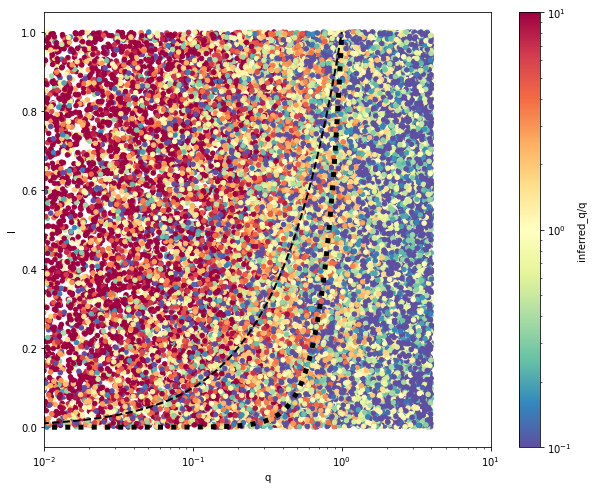

In [21]:
plot_scatter_with_lines(df_filter, 'q', 'l', 'inferred_q', 'q', 'inferred_q/q')

# Gaia DR3 

In [22]:
# load data in a dataframe
gaia = pd.read_csv('data/gaia_dr3.csv')

In [23]:
# load data in a dataframe
nss_two_body_orbit = pd.read_csv('data/nss_two_body_orbit.csv')

### Cross match sample with nss_two_body_orbit dataset containing orbital parameters 

In [24]:
# merge gaia to nss_two_body_orbit on source_id. I want to keep all columns but the rows need to have the same source_id
nss_gaia = pd.merge(nss_two_body_orbit, gaia, on='SOURCE_ID', how='inner')

df = nss_gaia

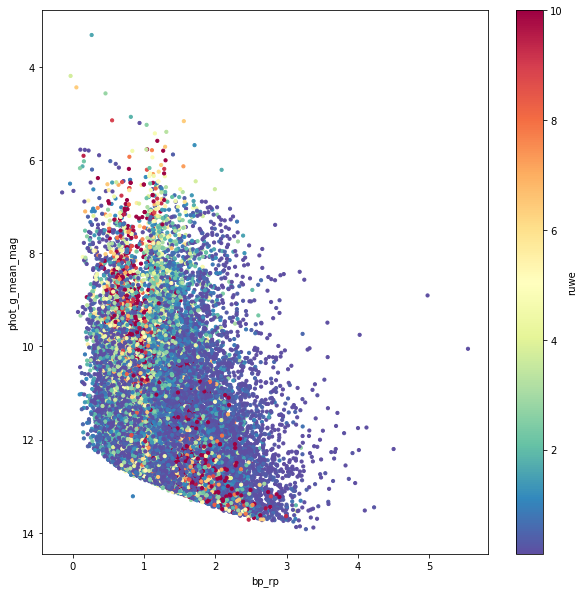

In [25]:
# plot bp_rp on x-axis and phot_g_mean_mag on y-axis color coded by ruwe flip the y-axis

# normalize the colormap from 0.1 to 10
norm = mpl.colors.Normalize(vmin=0.1, vmax=10)

plt.figure(figsize=(10, 10))
plt.scatter(df['bp_rp'], df['phot_g_mean_mag'], c=df['ruwe']-1, cmap='Spectral_r', s=10, norm=norm)
plt.colorbar(label='ruwe')
plt.xlabel('bp_rp')
plt.ylabel('phot_g_mean_mag')
plt.gca().invert_yaxis()
plt.show()

### parameter space

In [26]:
# read the CSV file back into a DataFrame
sb = pd.read_csv('data/10k_SB.csv')

# Keep in the dataframe only Periods less than dr3Period = 2.8333333333333335 years
sb = sb[sb['P'] <= dr3Period]

# N = dr3Period / df['P'] create a new column 'N' in the DataFrame
sb['N_orb'] = sb['P'] / dr3Period

# print the column names
print(sb.columns)

Index(['RA', 'Dec', 'pmRA', 'pmDec', 'pllx', 'M_tot', 'q', 'l', 'a', 'e', 'P',
       'tPeri', 'vTheta', 'vPhi', 'vOmega', 'predict_dTheta', 'simple_dTheta',
       'N_obs', 'sigma_al', 'sigma_ac', 'fit_ra', 'fit_dec', 'fit_pmrac',
       'fit_pmdec', 'fit_pllx', 'sigma_rac', 'sigma_dec', 'sigma_pmrac',
       'sigma_pmdec', 'sigma_pllx', 'N_vis', 'frac_good', 'AEN', 'UWE',
       'N_orb'],
      dtype='object')


# Calculate Radial Velocity Error

#### Assume P<=B and zeta = zeta_0

In [27]:
# Sample zeta_0 and beta_0 from normal distributions with mean 0.5 and standard deviation 0.2
sb['zeta_0'] = np.random.normal(0.5, 0.2, len(sb))
sb['beta_0'] = np.random.normal(0.5, 0.2, len(sb))

In [28]:
# calculate sigma_spectroscopic_error for all the data points in the dataframe
sb['sigma_spectroscopic_error'] = sigma_spectroscopic_error(sb['q'], sb['a'], sb['P'], sb['zeta_0'])

# Calculate sigma_theta

#### Assume P<=B and beta = beta_0

In [29]:
# calculate sigma_astrometric_error for all the data points in the dataframe
sb['sigma_astrometric_error'] = sigma_astrometric_error(sb['q'], sb['l'], sb['pllx'], sb['a'], AU, sb['beta_0'])

# Calculate inferred P' and q' 

#### The inferred mass ratios and periods using Equations 8 and 11 are described below

In [30]:
sb["P'"] = inferred_P(AU, sb['sigma_spectroscopic_error'], sb['sigma_astrometric_error'], sb['pllx'], sb['zeta_0'], sb['beta_0'])
sb = sb[sb["P'"] < 3]

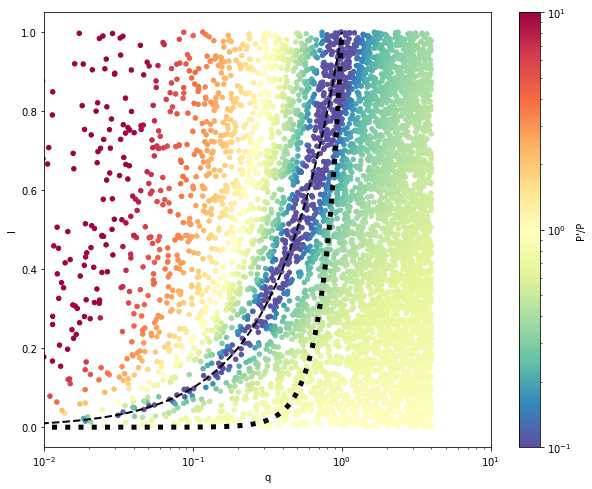

In [32]:
plot_scatter_with_lines(sb, 'q', 'l', "P'", "P", "P'/P")

In [33]:
sb["q'"] = solve_q(AU, G, M_sun, sb['sigma_spectroscopic_error'], sb['sigma_astrometric_error'], sb['pllx'], sb['zeta_0'], sb['beta_0'])

In [34]:
sb = sb[sb["q'"]<4]

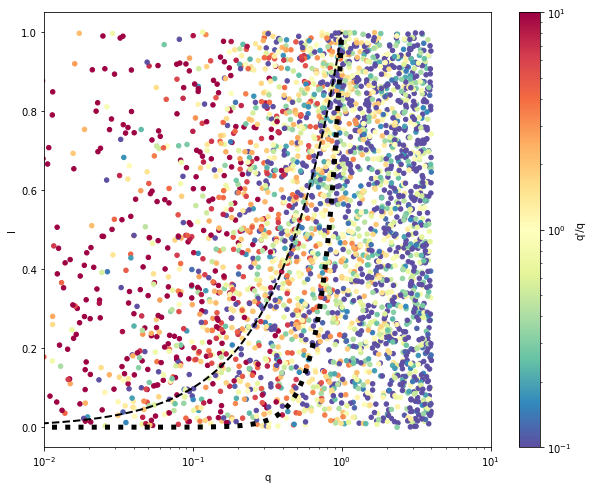

In [35]:
plot_scatter_with_lines(sb, 'q', 'l', "q'", "q", "q'/q")

#### Simulate Dark-Binaries

In [36]:
# read the CSV file back into a DataFrame
db = pd.read_csv('data/10k_DB.csv')

# Keep in the dataframe only Periods less than dr3Period = 2.8333333333333335 years
db = db[db['P'] <= dr3Period]

# N = dr3Period / df['P'] create a new column 'N' in the DataFrame
db['N_orb'] = db['P'] / dr3Period

# print the column names
print(db.columns)

Index(['RA', 'Dec', 'pmRA', 'pmDec', 'pllx', 'M_tot', 'q', 'l', 'a', 'e', 'P',
       'tPeri', 'vTheta', 'vPhi', 'vOmega', 'predict_dTheta', 'simple_dTheta',
       'N_obs', 'sigma_al', 'sigma_ac', 'fit_ra', 'fit_dec', 'fit_pmrac',
       'fit_pmdec', 'fit_pllx', 'sigma_rac', 'sigma_dec', 'sigma_pmrac',
       'sigma_pmdec', 'sigma_pllx', 'N_vis', 'frac_good', 'AEN', 'UWE',
       'N_orb'],
      dtype='object')


# Calculate Radial Velocity Error

#### Assume P<=B and zeta = zeta_0

In [37]:
# Sample zeta_0 and beta_0 from normal distributions with mean 0.5 and standard deviation 0.2
db['zeta_0'] = np.random.normal(0.5, 0.2, len(db))
db['beta_0'] = np.random.normal(0.5, 0.2, len(db))

In [38]:
db['sigma_spectroscopic_error'] = sigma_spectroscopic_error(db['q'], db['a'], db['P'], db['zeta_0'])

# Calculate sigma_theta

#### Assume P<=B and beta = beta_0

In [39]:
db['sigma_astrometric_error'] = sigma_astrometric_error(db['q'], db['l'], db['pllx'], db['a'], AU, db['beta_0'])

# Calculate inferred P' and q' 

#### The inferred mass ratios and periods using Equations 8 and 11 are described below

In [40]:
db["P'"] = inferred_P(AU, db['sigma_spectroscopic_error'], db['sigma_astrometric_error'], db['pllx'], db['zeta_0'], db['beta_0'])

In [41]:
db = db[db["P'"]<3]

In [42]:
db["q'"] = solve_q(AU, G, M_sun, db['sigma_spectroscopic_error'], db['sigma_astrometric_error'], db['pllx'], db['zeta_0'], db['beta_0'])


/Users/ynwa1995/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
db = db[db["q'"]<4]

# Plot parameter space

In [44]:
db['M_1'] = 1
sb['M_1'] = 1
db['M_2'] = db['q'] * db['M_1']
sb['M_2'] = sb['q'] * sb['M_1']

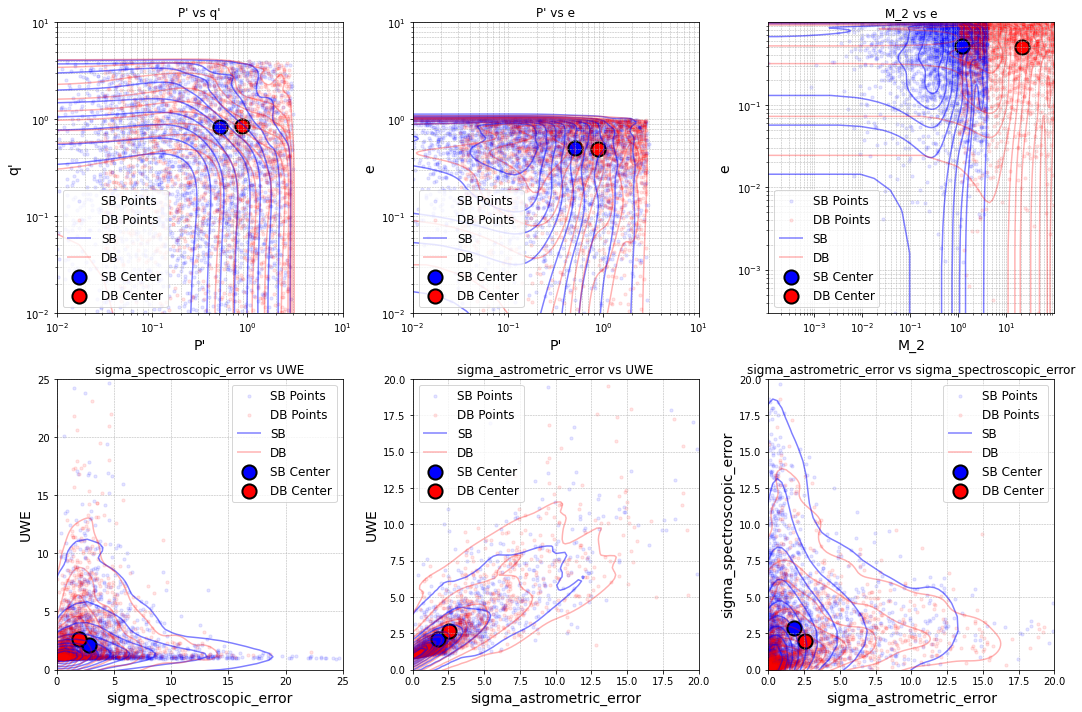

In [45]:
import matplotlib.pyplot as plt

# Assuming plot_single_cluster_with_center is already defined and modified to accept an axis parameter

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the number of rows and columns as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# List of parameters for each subplot
params = [
    ("P'", "q'", (10e-3, 10), (10e-3, 10), True, True),
    ("P'", "e", (10e-3, 10), (10e-3, 10),True, True),
    ("M_2", "e", None, None, True, True),
    ("sigma_spectroscopic_error", "UWE", (0, 25), (0, 25), False, False),
    ("sigma_astrometric_error", "UWE", (0, 20), (0, 20), False, False),
    ("sigma_astrometric_error", "sigma_spectroscopic_error", (0, 20), (0, 20), False, False)
]

# Plot each subplot
for ax, (x, y, x_lim, y_lim, log_x, log_y) in zip(axs, params):
    plot_single_cluster_with_center(sb, db, x, y, x_lim=x_lim, y_lim=y_lim, log_x=log_x, log_y=log_y, ax=ax)
    ax.set_title(f'{x} vs {y}')

# Adjust layout
plt.tight_layout()
plt.show()

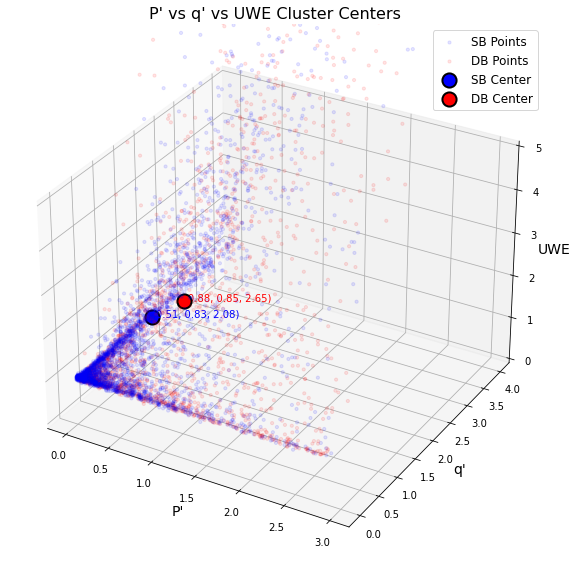

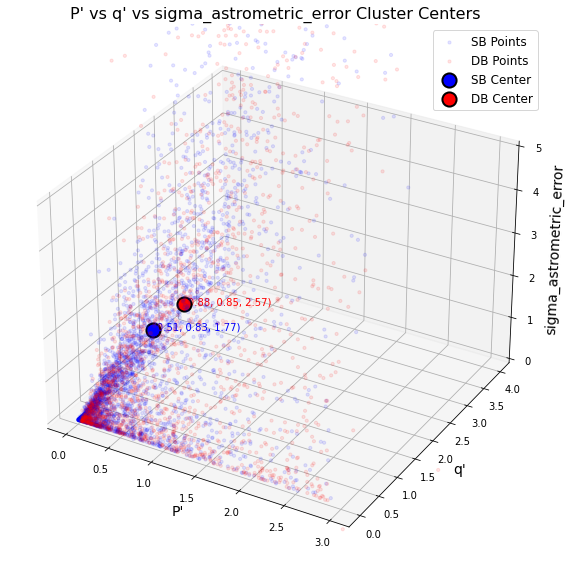

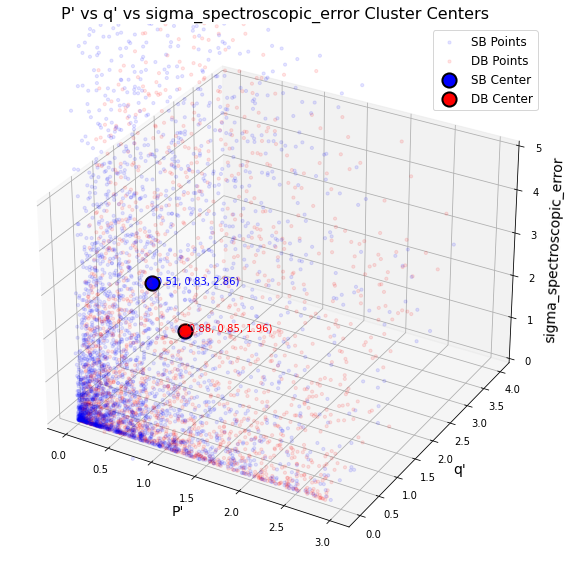

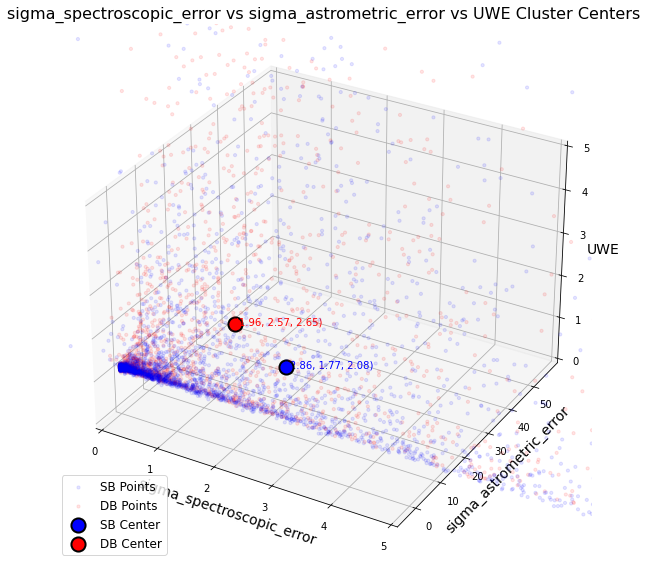

In [46]:
plot_3d_clusters(sb, db, "P'", "q'", "UWE", x_min=None, x_max=None, y_min=None, y_max=None, z_min=0, z_max=5)
plot_3d_clusters(sb, db, "P'", "q'", "sigma_astrometric_error", x_min=None, x_max=None, y_min=None, y_max=None, z_min=0, z_max=5)
plot_3d_clusters(sb, db, "P'", "q'", "sigma_spectroscopic_error", x_min=None, x_max=None, y_min=None, y_max=None, z_min=0, z_max=5)
plot_3d_clusters(sb, db, "sigma_spectroscopic_error", "sigma_astrometric_error", "UWE", x_min=0, x_max=5, y_min=None, y_max=None, z_min=0, z_max=5)

## Missing Data Inference with ML

Training model:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting test set:   0%|          | 0/1 [00:00<?, ?it/s]

Mean Squared Error: 0.04664055219634903
Mean Absolute Error: 0.1573922838414869
R² Score: -0.32413868954745717
Root Mean Squared Error: 0.2159642382348268
                   Feature  Importance
7                       ra    0.456188
5  center_of_mass_velocity    0.129090
6             t_periastron    0.101929
4                    pmdec    0.098200
0                      dec    0.090027
2           arg_periastron    0.064074
1                   period    0.036319
3                SOURCE_ID    0.024173
8   semi_amplitude_primary    0.000000


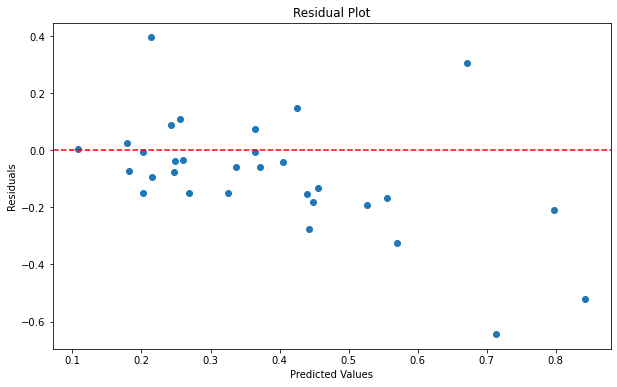

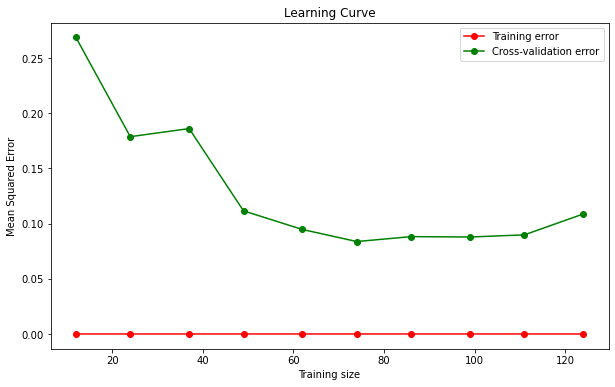

Predicting missing values:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
nss_two_body_orbit = fill_missing_values(nss_two_body_orbit, 'mass_ratio')

In [48]:
# merge gaia to nss_two_body_orbit on source_id. I want to keep all columns but the rows need to have the same source_id
nss_gaia = pd.merge(nss_two_body_orbit, gaia, on='SOURCE_ID', how='inner')

df = nss_gaia

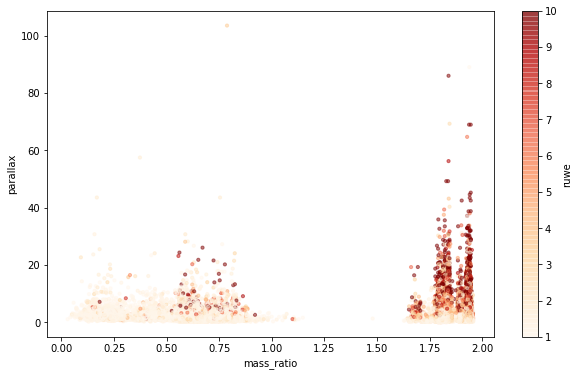

In [49]:
# convert period to years from days
df['period'] = df['period'] / 365.25

# plot the mass ratio vs eccentricity scatter plot with center of clusters and color code them by ruwe

plt.figure(figsize=(10, 6))
norm = mpl.colors.Normalize(vmin=1, vmax=10)
plt.scatter(df['mass_ratio'], df['parallax'], c=df['ruwe'], cmap='OrRd', s=10, alpha=0.5 , norm=norm)
plt.xlabel('mass_ratio')
plt.ylabel('parallax')
plt.colorbar(label='ruwe')
plt.show()